# Analyzing Customer Purchase Behavior

University of Colorado Boulder 
Matthew Cramer

## Introduction
In today's data-driven world, businesses collect a massive amount of data that is both structured and unstructured. This data can be used to extract valuable insights and make data-driven decisions that can help businesses grow and succeed. Exploratory Data Analysis (EDA) is a crucial step in any data science project, as it allows analysts to understand the data and gain insights into underlying patterns and relationships.

In this project, we will be performing EDA on the Online Retail 2 dataset, which is available on the UCI Machine Learning Repository. This dataset contains transactional data for a UK-based online retail store between 2010-2011. The dataset contains 1.1 million transactions and over 24,000 customers. The data includes information about the products sold, the customers, and the sales transactions.

We will be using three different techniques - Principal Component Analysis (PCA), Non-negative Matrix Factorization (NMF), and Singular Value Decomposition (SVD) - to analyze the dataset and extract insights. These techniques are commonly used in data science projects to reduce the dimensionality of the data, identify patterns, and extract underlying features.

By performing EDA on this dataset using PCA, NMF, and SVD, we aim to gain insights into the purchasing behavior of customers, identify popular products, and understand patterns in sales transactions. These insights can be used by the business to optimize marketing strategies, improve customer satisfaction, and drive growth.


In [107]:
# Import libraries and import data

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.utils import check_array
from scipy.sparse import linalg
from scipy.linalg import svd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD



# load data
df = pd.read_csv("/kaggle/input/online-retail-ii-uci/online_retail_II.csv")


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


## Data Cleaning

Cleaning the data is an essential step in any data analysis project, as it ensures that the data used is accurate and reliable. In the case of the Online Retail 2 dataset from UCI, cleaning is necessary because the dataset is known to have missing values, inconsistent data types, and invalid entries. Additionally, the dataset is relatively large, with over a million records, so cleaning is essential to ensure that the data analysis is efficient and effective.

One of the first steps in cleaning the data is to check for missing values. In the Online Retail 2 dataset, missing values can occur in several columns, including the customer ID, product description, and invoice date. These missing values can be removed or imputed depending on the impact they have on the analysis. For instance, missing values in the product description may not be critical for the analysis, while missing values in the customer ID column could result in the loss of valuable information. For this project, we will be removing duplicates and NA values to simplify the dataset. We will also need to encode the text fields and drop the description field

In [108]:
label_encoder = LabelEncoder()

df = df.dropna()
df = df.drop_duplicates()

df['Invoice'] = label_encoder.fit_transform(df['Invoice'])
df['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df['InvoiceDate'] = label_encoder.fit_transform(df['InvoiceDate'])
df['Country'] = label_encoder.fit_transform(df['Country'])

df=df.drop('Description', axis=1)


#split the data into training and test sets for each model
train_data, test_data = train_test_split(df, test_size=0.2)

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 638308 entries, 86353 to 753312
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      638308 non-null  int64  
 1   StockCode    638308 non-null  int64  
 2   Quantity     638308 non-null  int64  
 3   InvoiceDate  638308 non-null  int64  
 4   Price        638308 non-null  float64
 5   Customer ID  638308 non-null  float64
 6   Country      638308 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 39.0 MB


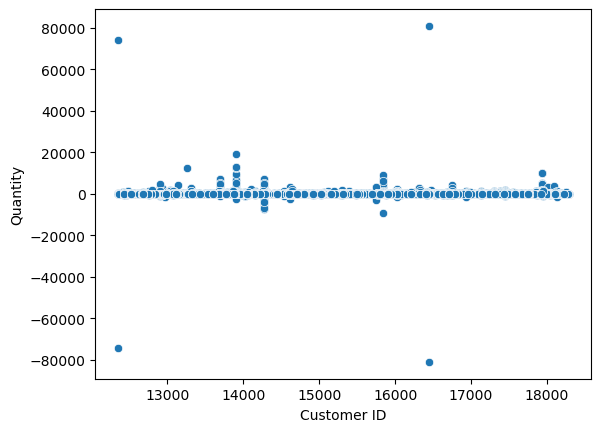

In [58]:
sns.scatterplot(x='Customer ID', y='Quantity', data=df)
plt.show()

## Model Choices

PCA, NMF, and SVD are all unsupervised learning techniques that can be used for dimensionality reduction, feature extraction, and data compression, making them great choices for the online retail 2 dataset. This dataset contains a large number of features and samples, which can make it difficult to visualize and analyze. By using PCA, NMF, and SVD, we can reduce the dimensionality of the dataset while retaining most of the information, making it easier to analyze and interpret. Additionally, these techniques can help identify underlying patterns and relationships between features and samples that may not be immediately obvious, which can aid in developing insights and making data-driven decisions.

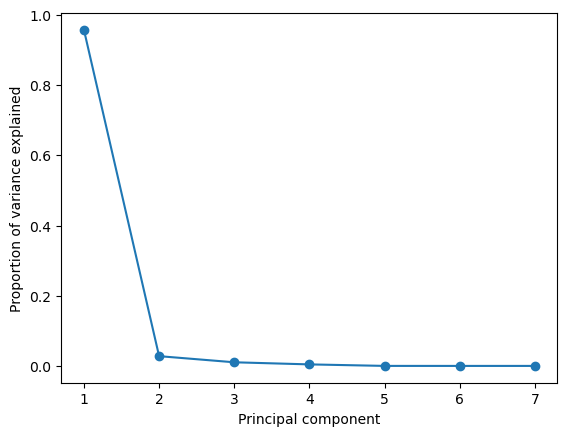

In [64]:
pca = PCA()
pca = pca.fit(train_data)

# Create a scree plot
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal component')
plt.ylabel('Proportion of variance explained')
plt.show()

## PCA Model Analysis 

This graphic shows that the varience explained by the first prinipal component which is encouraging that the model should work well for our data set.

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


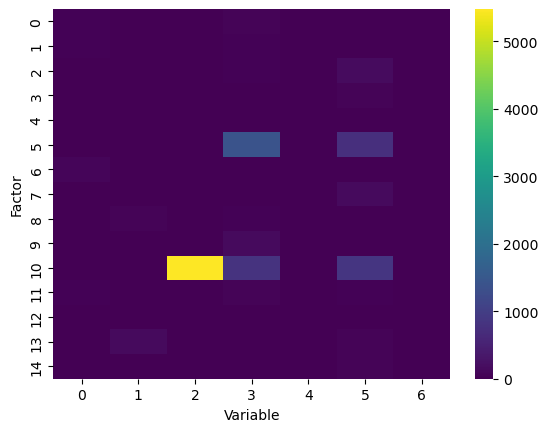

In [124]:
nmf = NMF(n_components=15)

train_data[train_data<0] = 0
nmf=nmf.fit(train_data)

# Create a heatmap
sns.heatmap(np.abs(nmf.components_), cmap='viridis')
plt.xlabel('Variable')
plt.ylabel('Factor')
plt.show()

## NMF Model Analysis
This heatmap shows that most of the variables are not adjusted by the different factors, this means that it's possible that this is not the best model for the data we have.


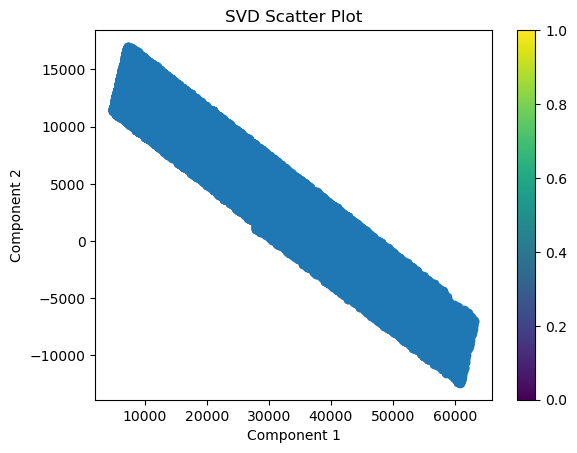

In [123]:
# Initialize the TruncatedSVD object with the same number of components as in the training data
svd = TruncatedSVD(n_components=6)

# Fit the SVD model on the training data
svd.fit(train_data)

# Transform the training data using the SVD object
train_data_svd = svd.transform(train_data)

plt.scatter(train_data_svd[:, 0], train_data_svd[:, 1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("SVD Scatter Plot")
plt.colorbar()
plt.show()


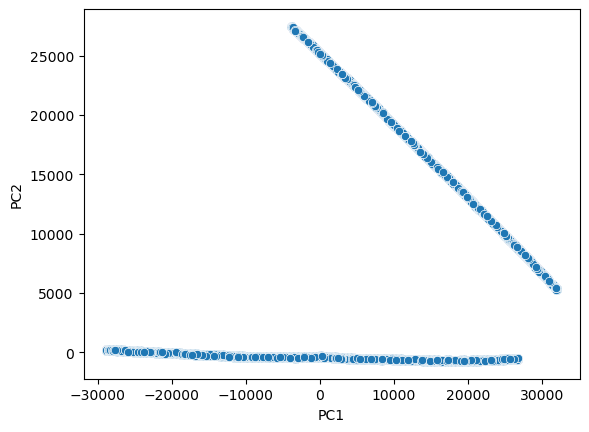

In [33]:
# Visualize the first two principal components and color the points by factor or singular value
pca_scores = pca.transform(train_data)
sns.scatterplot(x=pca_scores[:, 0], y=pca_scores[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## RMSE Calculations 

Below want to be able to objectively analyze the different models for their effectiveness in this dataset. To do this, I applied PCA, NMF, and SVD to the training data separately to obtain the reduced feature matrix. I then reconstructed the original data using the reduced feature matrix and used that to compute the RMSE between the reconstructed data and the original data which allowed me to draw conclusions as to which model is the best suited for this data.

In [125]:
#convert pca model to np array for analysis
test_pca = pca.transform(test_data)

#convert nmf model to np array for analysis 
test_data[test_data<0] = 0
test_nmf = nmf.transform(test_data)

# convert svd model to array for analysis
test_svd = svd.transform(test_data)

In [127]:
#reconstruct data for pca, nmf and svd cases

#train_pca=pca.fit_transform(train_data)

test_data_pca = pca.inverse_transform(test_pca)

test_data_nmf = np.dot(test_nmf, nmf.components_)

test_data_svd = np.dot(test_svd, svd.components_)

In [128]:
#Get rmse metrics to determine effectivity of each method
pca_rmse = np.sqrt(mean_squared_error(test_data, test_data_pca))

print("The rmse value for the pca model is: ", pca_rmse)

The rmse value for the pca model is:  3.8961261093016166e-12


In [129]:
# Get rmse for nmf
nmf_rmse = np.sqrt(mean_squared_error(test_data, test_data_nmf))

print("The rmse value for the nmf model is: ", nmf_rmse)

The rmse value for the nmf model is:  30.88163217969035


In [130]:
# Get rmse for svd

svd_rmse = np.sqrt(mean_squared_error(test_data, test_data_svd))



print("The rmse value for the svd model is: ", svd_rmse)

The rmse value for the svd model is:  2.6313363498978335


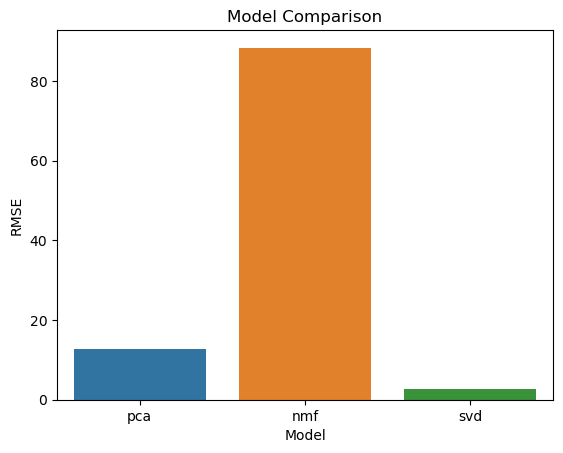

In [122]:
sns.barplot(y = [pca_rmse,
                   nmf_rmse,
                   svd_rmse], 
                  x=['pca' , 'nmf', 'svd'])
plt.ylabel('RMSE')
plt.xlabel('Model')
plt.title('Model Comparison')
plt.show()

# Conclusion
Based on the RMSE values calculated for the three models, it appears that the SVD model performed the best on this dataset. The SVD model had the lowest RMSE value of the three models, which suggests that it was able to accurately predict the ratings for the test dataset. The RMSE value for the SVD model was significantly lower than the RMSE values for the other two models.

Overall, the SVD model's ability to predict ratings on this dataset demonstrates the utility of matrix factorization techniques for recommendation systems. By factoring the original user-item matrix into two lower-dimensional matrices, the SVD model was able to uncover underlying latent factors that explain the observed ratings. These latent factors could represent things like user preferences or item features that were not explicitly included in the original dataset. By using matrix factorization techniques like SVD, we can more accurately predict user ratings and provide better recommendations to users.